In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os, sys
sys.path.append('..')


from scripts.data_utils.loaders import load_data
from scripts.data_utils.utils import summarize_data, merge_geolocation
from scripts.data_utils.cleaning import handle_missing_values, clean_data
from scripts.utils.visualizaion import *

DATAPATH = os.path.join('..', 'resources', 'data')

In [3]:
# Load datasets
fraud_df = load_data(os.path.join(DATAPATH, "Fraud_Data.csv"))
ip_df = load_data(os.path.join(DATAPATH, "IpAddress_to_Country.csv"))
credit_df = load_data(os.path.join(DATAPATH, "creditcard.csv"))
fraud_df.shape, ip_df.shape, credit_df.shape

2025-02-09 13:15:10 - [✅ INFO] - Loading data from ..\resources\data\Fraud_Data.csv
2025-02-09 13:15:12 - [✅ INFO] - Successfully loaded data from ..\resources\data\Fraud_Data.csv
2025-02-09 13:15:12 - [✅ INFO] - Loading data from ..\resources\data\IpAddress_to_Country.csv
2025-02-09 13:15:12 - [✅ INFO] - Successfully loaded data from ..\resources\data\IpAddress_to_Country.csv
2025-02-09 13:15:12 - [✅ INFO] - Loading data from ..\resources\data\creditcard.csv
2025-02-09 13:15:19 - [✅ INFO] - Successfully loaded data from ..\resources\data\creditcard.csv


((151112, 11), (138846, 3), (284807, 31))

In [4]:
# Display basic info
summarize_data(fraud_df)

2025-02-09 13:15:19 - [✅ INFO] - 
--- Data Summary ---
2025-02-09 13:15:22 - [✅ INFO] -                    count  unique                  top   freq  \
user_id         151112.0  151112                  NaN    NaN   
signup_time       151112  151112  2015-02-24 22:55:49      1   
purchase_time     151112  150679  2015-06-08 09:42:04      3   
purchase_value  151112.0     122                  NaN    NaN   
device_id         151112  137956        CQTUVBYIWWWBC     20   
source            151112       3                  SEO  60615   
browser           151112       5               Chrome  61432   
sex               151112       2                    M  88293   
age             151112.0      58                  NaN    NaN   
ip_address      151112.0  143512                  NaN    NaN   
class           151112.0       2                  NaN    NaN   

                             mean                std           min  \
user_id              200171.04097      115369.285024           2.0   
sig

In [5]:
# Display basic information
summarize_data(credit_df)

2025-02-09 13:15:24 - [✅ INFO] - 
--- Data Summary ---
2025-02-09 13:15:26 - [✅ INFO] -            count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.6733

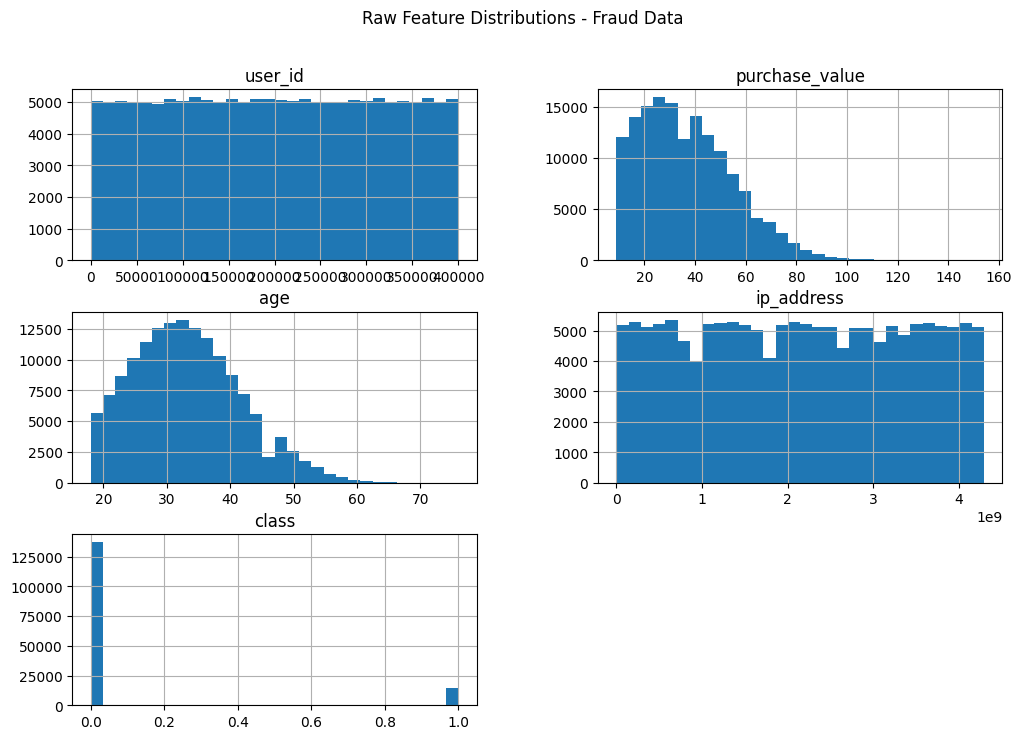

In [6]:
# Raw Feature Distributions for fraud dataset
plot_hist(data=fraud_df, title="Raw Feature Distributions - Fraud Data")

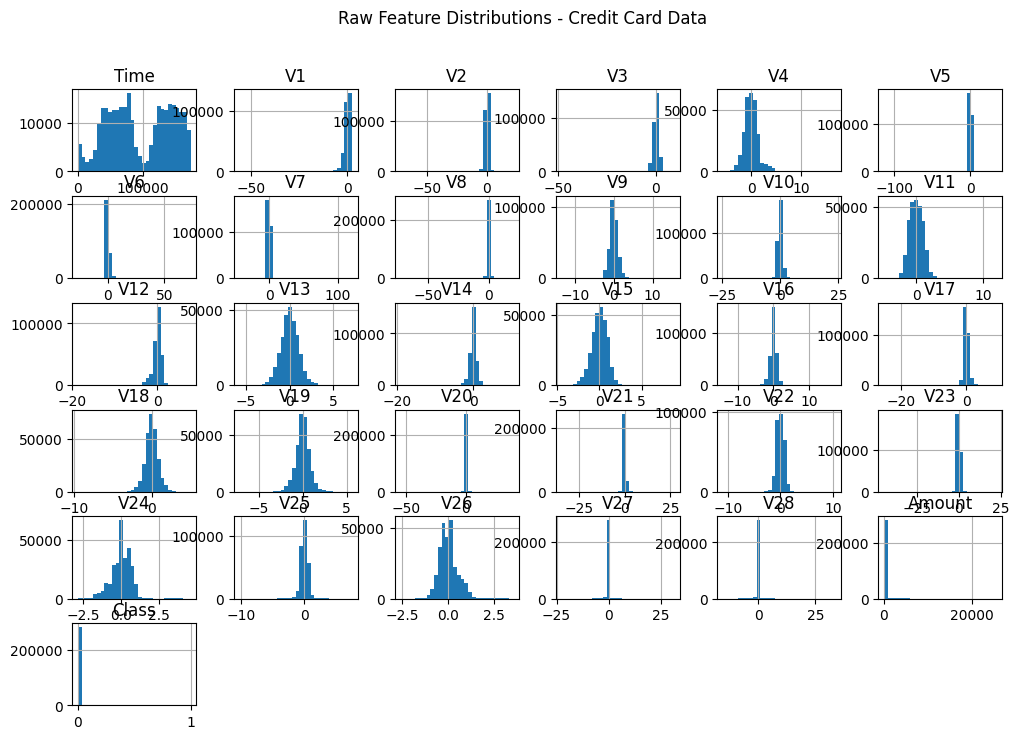

In [7]:
# Raw Feature Distributions for credit dataset
plot_hist(data=credit_df, title="Raw Feature Distributions - Credit Card Data") 

Correlation Analysis

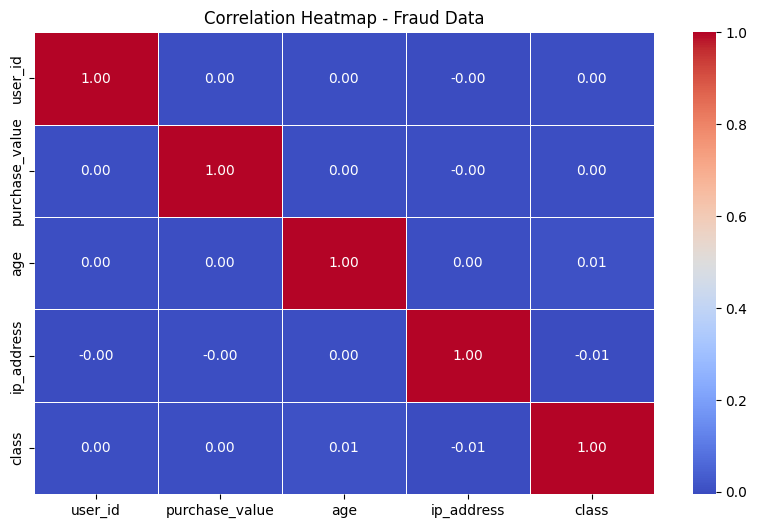

In [9]:
# Correlation Analysis
plot_correlation(fraud_df, title="Correlation Heatmap - Fraud Data")

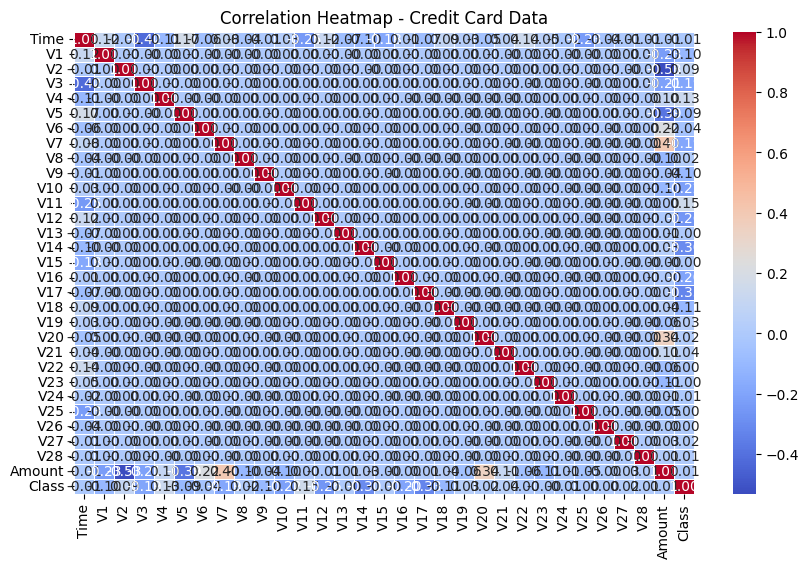

In [10]:
plot_correlation(credit_df, title="Correlation Heatmap - Credit Card Data")

Preprocessing

In [11]:
# Data Preprocessing
fraud_df = handle_missing_values(fraud_df)
fraud_df

2025-02-09 13:28:29 - [✅ INFO] - Missing values before handling:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
2025-02-09 13:28:29 - [✅ INFO] - Missing values:
Series([], dtype: int64)
2025-02-09 13:28:31 - [✅ INFO] - Handled missing values.
2025-02-09 13:28:32 - [✅ INFO] - Missing values after handling:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [12]:
fraud_df = clean_data(fraud_df)
fraud_df

2025-02-09 13:28:34 - [✅ INFO] - Removed 0 duplicate rows.
2025-02-09 13:28:35 - [✅ INFO] - Data cleaned: duplicates removed, data types corrected.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


Univariate Analysis - FraudData

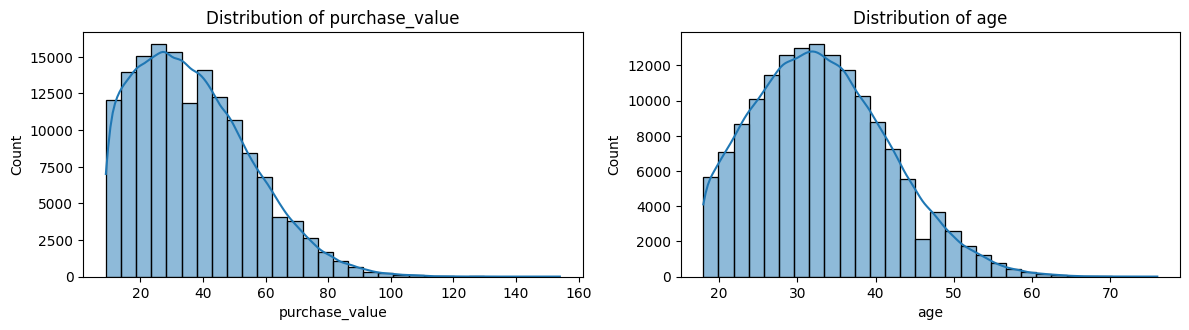

In [13]:
# Numeric Feature Distribution
plot_numerical(fraud_df, ['purchase_value', 'age'])

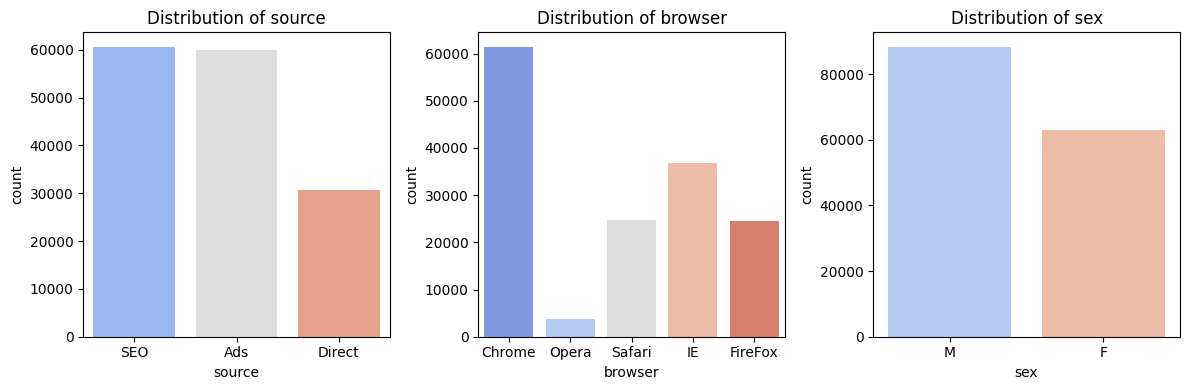

In [14]:
# Categorical Feature Distribution
categorical_features = ['source', 'browser', 'sex']
plot_categorical(fraud_df, categorical_features)

Bivariate Analysis (Fraud vs. Non-Fraud)

2025-02-09 13:28:50 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 13:28:50 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


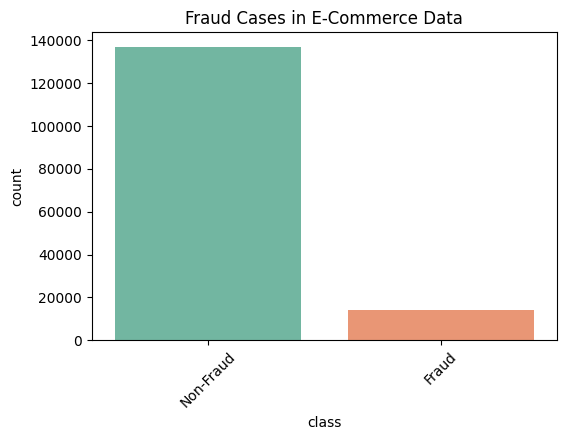

In [15]:
# Fraud Distribution in E-Commerce Data
plot_count(data=fraud_df, column='class', title="Fraud Cases in E-Commerce Data")

2025-02-09 13:28:53 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 13:28:53 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


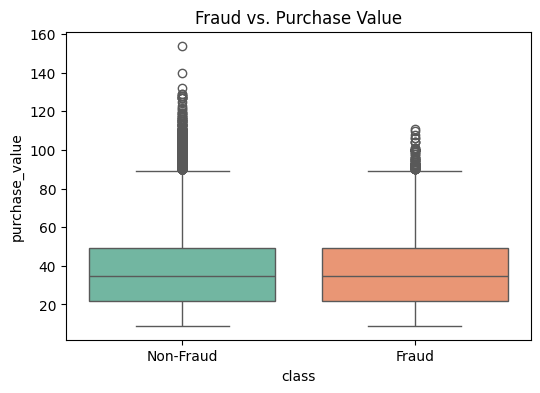

In [16]:
# Fraud vs. Purchase Value
plot_box(data=fraud_df, x='class', y='purchase_value', title="Fraud vs. Purchase Value")

2025-02-09 13:28:54 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 13:28:55 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


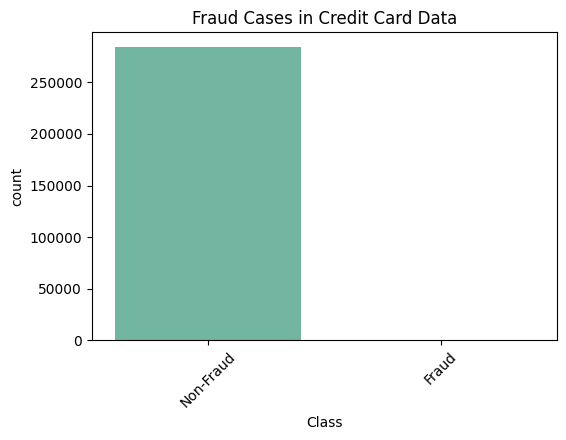

In [17]:
# Fraud Cases in Credit Card Data
plot_count(data=credit_df, column='Class', title="Fraud Cases in Credit Card Data")

In [18]:
# Merge Geolocation Data
fraud_df = merge_geolocation(fraud_df, ip_df)
fraud_df

2025-02-09 13:29:01 - [✅ INFO] - Merged fraud dataset with geolocation data.
2025-02-09 13:29:01 - [✅ INFO] - Merged transactions with geolocation data.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,NaN
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,NaN
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,NaN
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,NaN
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,NaN
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,NaN
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,NaN


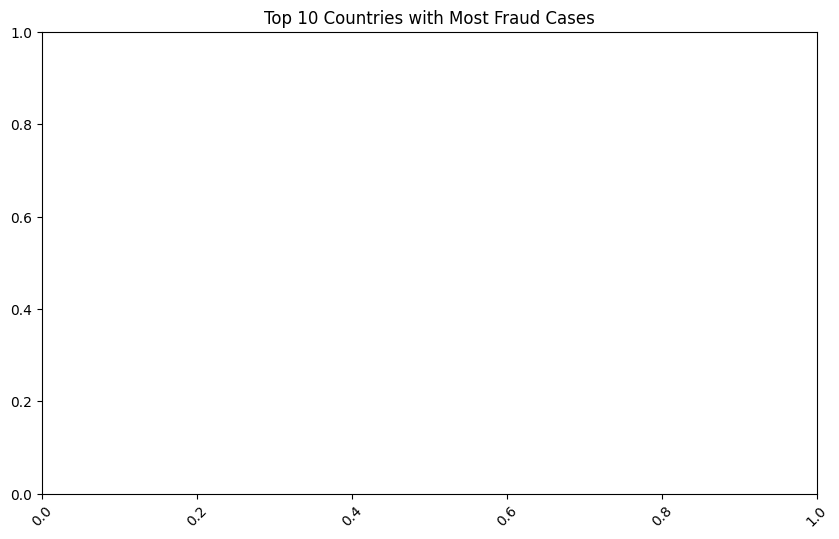

In [20]:
# Geolocation Fraud Analysis
fraud_by_country = fraud_df.groupby("country")["class"].sum().sort_values(ascending=False).head(10)
plot_bar(fraud_by_country, title="Top 10 Countries with Most Fraud Cases")

In [ ]:
fraud_df.to_csv(os.path.join(DATAPATH, 'preprocessed', "fraud_preprocessed.csv"), index=False)